In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Прочитаем данные по странам:

In [172]:
data = {}
data['US'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/USvideos.csv')
data['CA'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/CAvideos.csv')
data['DE'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/DEvideos.csv')
data['FR'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/FRvideos.csv')
data['GB'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/GBvideos.csv')
data['IN'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/INvideos.csv')
data['JP'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/JPvideos.csv', encoding=('ISO-8859-5'))
data['KR'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/KRvideos.csv', encoding=('ISO-8859-5'))
data['MX'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/MXvideos.csv', encoding=('ISO-8859-5'))
data['RU'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/RUvideos.csv', encoding=('ISO-8859-5'))
data['US'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Посмотрим, есть ли пропуски в данных.

In [173]:
for key, table in data.items():
    print('%s:\n' % key)
    for column in table.columns:
        print('%s: %s' % (column.upper(), table[column].isna().sum()))
    print('\nTotal rows: %s' % len(table))

US:

VIDEO_ID: 0
TRENDING_DATE: 0
TITLE: 0
CHANNEL_TITLE: 0
CATEGORY_ID: 0
PUBLISH_TIME: 0
TAGS: 0
VIEWS: 0
LIKES: 0
DISLIKES: 0
COMMENT_COUNT: 0
THUMBNAIL_LINK: 0
COMMENTS_DISABLED: 0
RATINGS_DISABLED: 0
VIDEO_ERROR_OR_REMOVED: 0
DESCRIPTION: 570

Total rows: 40949
CA:

VIDEO_ID: 0
TRENDING_DATE: 0
TITLE: 0
CHANNEL_TITLE: 0
CATEGORY_ID: 0
PUBLISH_TIME: 0
TAGS: 0
VIEWS: 0
LIKES: 0
DISLIKES: 0
COMMENT_COUNT: 0
THUMBNAIL_LINK: 0
COMMENTS_DISABLED: 0
RATINGS_DISABLED: 0
VIDEO_ERROR_OR_REMOVED: 0
DESCRIPTION: 1296

Total rows: 40881
DE:

VIDEO_ID: 0
TRENDING_DATE: 0
TITLE: 0
CHANNEL_TITLE: 0
CATEGORY_ID: 0
PUBLISH_TIME: 0
TAGS: 0
VIEWS: 0
LIKES: 0
DISLIKES: 0
COMMENT_COUNT: 0
THUMBNAIL_LINK: 0
COMMENTS_DISABLED: 0
RATINGS_DISABLED: 0
VIDEO_ERROR_OR_REMOVED: 0
DESCRIPTION: 1552

Total rows: 40840
FR:

VIDEO_ID: 0
TRENDING_DATE: 0
TITLE: 0
CHANNEL_TITLE: 0
CATEGORY_ID: 0
PUBLISH_TIME: 0
TAGS: 0
VIEWS: 0
LIKES: 0
DISLIKES: 0
COMMENT_COUNT: 0
THUMBNAIL_LINK: 0
COMMENTS_DISABLED: 0
RATINGS_DISA

Пропуски есть только в столбце с описанием примерно в 4% от данных. Я думаю, нам не нужно что-то с этим делать, так как описание не будет является ключевым фактором в данном анализе.
Просто заменим пустые ячейки описания на название видео.

In [174]:
for table in data.values():
    flags = table['description'].isna()
    table.loc[flags, 'description'] = table.loc[flags, 'title']

for key, table in data.items():
    print('%s:\n' % key)
    for column in table.columns:
        print('%s: %s' % (column.upper(), table[column].isna().sum()))
    print('\nTotal rows: %s' % len(table))

US:

VIDEO_ID: 0
TRENDING_DATE: 0
TITLE: 0
CHANNEL_TITLE: 0
CATEGORY_ID: 0
PUBLISH_TIME: 0
TAGS: 0
VIEWS: 0
LIKES: 0
DISLIKES: 0
COMMENT_COUNT: 0
THUMBNAIL_LINK: 0
COMMENTS_DISABLED: 0
RATINGS_DISABLED: 0
VIDEO_ERROR_OR_REMOVED: 0
DESCRIPTION: 0

Total rows: 40949
CA:

VIDEO_ID: 0
TRENDING_DATE: 0
TITLE: 0
CHANNEL_TITLE: 0
CATEGORY_ID: 0
PUBLISH_TIME: 0
TAGS: 0
VIEWS: 0
LIKES: 0
DISLIKES: 0
COMMENT_COUNT: 0
THUMBNAIL_LINK: 0
COMMENTS_DISABLED: 0
RATINGS_DISABLED: 0
VIDEO_ERROR_OR_REMOVED: 0
DESCRIPTION: 0

Total rows: 40881
DE:

VIDEO_ID: 0
TRENDING_DATE: 0
TITLE: 0
CHANNEL_TITLE: 0
CATEGORY_ID: 0
PUBLISH_TIME: 0
TAGS: 0
VIEWS: 0
LIKES: 0
DISLIKES: 0
COMMENT_COUNT: 0
THUMBNAIL_LINK: 0
COMMENTS_DISABLED: 0
RATINGS_DISABLED: 0
VIDEO_ERROR_OR_REMOVED: 0
DESCRIPTION: 0

Total rows: 40840
FR:

VIDEO_ID: 0
TRENDING_DATE: 0
TITLE: 0
CHANNEL_TITLE: 0
CATEGORY_ID: 0
PUBLISH_TIME: 0
TAGS: 0
VIEWS: 0
LIKES: 0
DISLIKES: 0
COMMENT_COUNT: 0
THUMBNAIL_LINK: 0
COMMENTS_DISABLED: 0
RATINGS_DISABLED: 0


Считываем идентификаторы для категорий видео.

In [175]:
data_cat = {}
data_cat['US'] = pd.read_json('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/US_category_id.json')
data_cat['CA'] = pd.read_json('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/CA_category_id.json')
data_cat['DE'] = pd.read_json('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/DE_category_id.json')
data_cat['FR'] = pd.read_json('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/FR_category_id.json')
data_cat['GB'] = pd.read_json('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/GB_category_id.json')
data_cat['IN'] = pd.read_json('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/IN_category_id.json')
data_cat['JP'] = pd.read_json('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/JP_category_id.json')
data_cat['KR'] = pd.read_json('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/KR_category_id.json')
data_cat['MX'] = pd.read_json('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/MX_category_id.json')
data_cat['RU'] = pd.read_json('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/RU_category_id.json')
data_cat['US'].head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


Все жанры, представленные в данных:

In [176]:
categories = {}
for cat in data_cat.values():
    for i in range(len(cat)):
        categories[int(cat.loc[i]['items']['id'])] = cat.loc[i]['items']['snippet']['title']
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

Рассмотрим 5 самых популярных категорий по странам. Анализируем по просмотрам.

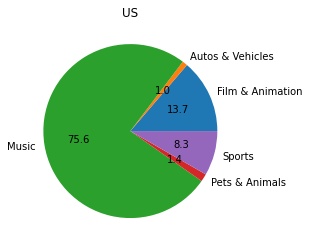

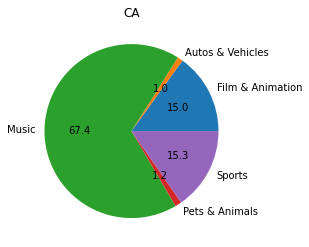

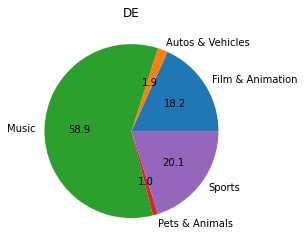

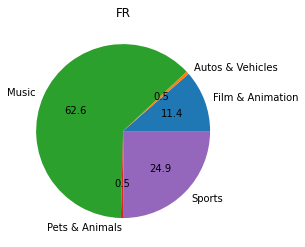

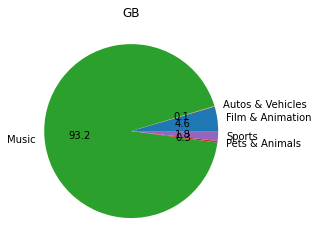

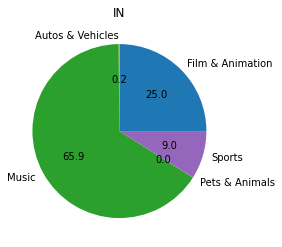

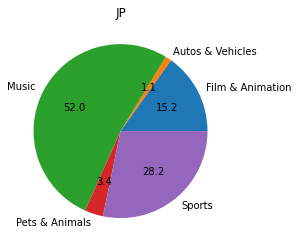

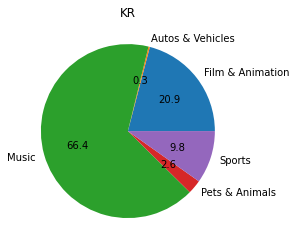

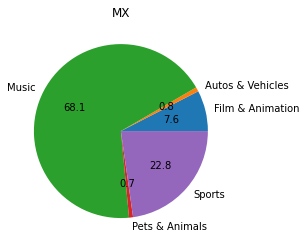

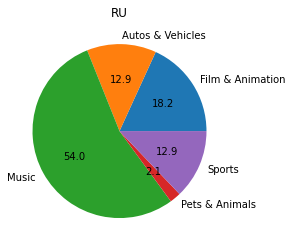

In [177]:

for key, table in data.items():
    names_of_categories = []
    values = []
    for i, val in table.groupby('category_id')['views'].sum().items():
        names_of_categories.append(categories[i])
        values.append(val)
    
    plt.title(key)
    plt.pie(values[:5], autopct='%.1f', labels = names_of_categories[:5])
    plt.show()

Самый популярный жанр - музыка (если судить по просмотрам).

Посмотрим на соотношение жанров по странам.

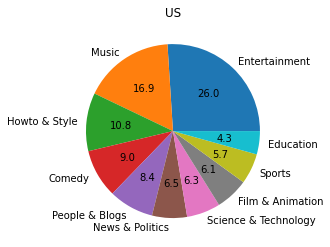

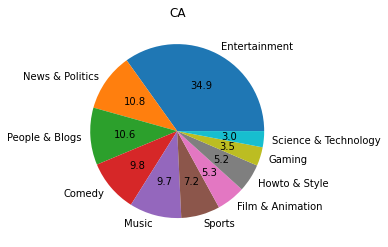

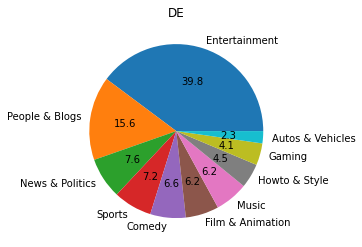

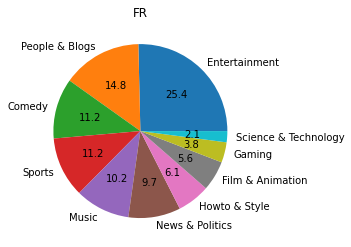

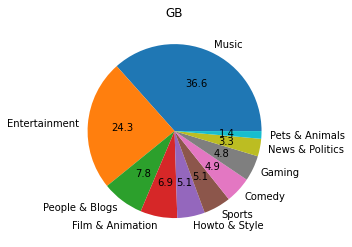

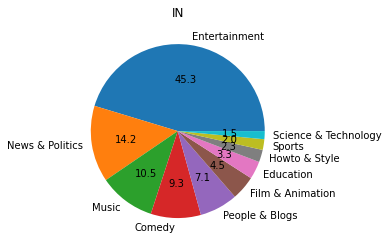

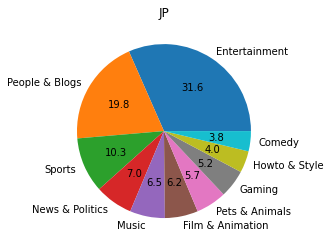

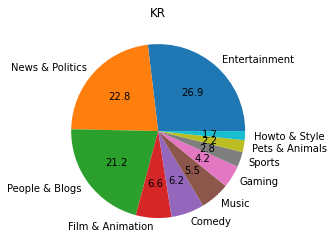

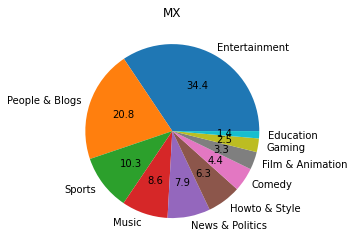

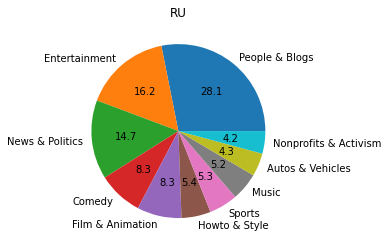

In [178]:
for key, table in data.items():
    names_of_categories = []
    values = []

    for i, val in table['category_id'].value_counts().items():
        names_of_categories.append(categories[i])
        values.append(val)

    plt.title(key)
    plt.pie(values[:10], autopct='%.1f', labels = names_of_categories[:10])
    plt.show()

Для всех стран больше всего видео по следующем жанрам:
1. Film & Animation
2. Auto & Vehicles
3. Music

Посмотрим на соотношение лайков и дизлайков по странам.

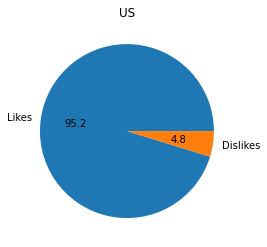

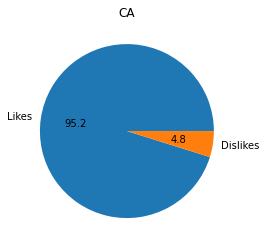

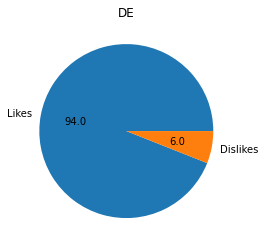

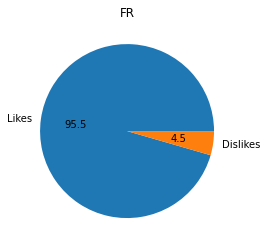

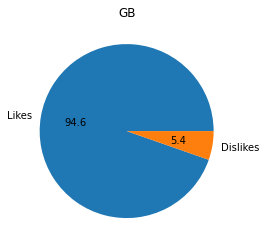

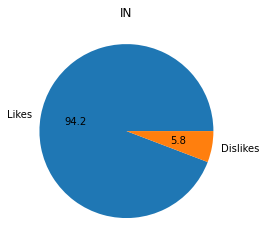

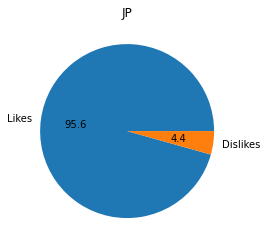

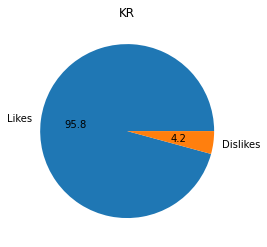

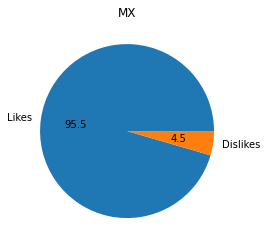

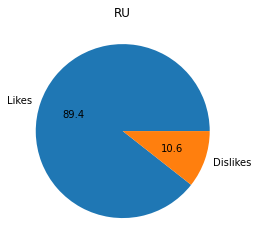

In [142]:
for key, table in data.items():
    plt.title(key)
    plt.pie([table['likes'].sum(), table['dislikes'].sum()],
            autopct='%.1f', labels=['Likes', 'Dislikes'])
    plt.show()

Можно заметить, что больше всего дизлайков в соотношении в России.